<a href="https://colab.research.google.com/github/rajkgoel/AW-Internet-Sales1/blob/master/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

A Decision Tree is a flow-chart-like model that makes decisions by asking a sequence of yes/no questions.



```
Is income > 50k?
 ├── Yes → Is age > 30?
 │       ├── Yes → Approve loan
 │       └── No  → Reject loan
 └── No  → Reject loan
```
- No equations.
- No distances.
- No scaling required.

2️⃣ How Does It Work Internally?
--

A Decision Tree:
- Picks the best feature
- Splits the data
- Repeats recursively
- Stops when:
  - Data becomes pure
  - Max depth reached
  - Minimum samples reached

It chooses splits based on impurity reduction.

3️⃣ Impurity Measures
--
🔹 Gini Impurity (default in sklearn)
-
Formula:

  $ Gini=1 − ∑p^2_i $
- 0 → perfectly pure
- 0.5 → mixed (binary case)

🔹 Entropy
-
$ Entropy= −∑p_i log_2(p_i) $
- 0 → pure
- 1 → highly mixed (binary case)

Decision Tree chooses splits that maximize information gain (reduce impurity).


Prediction for age 28: [0]


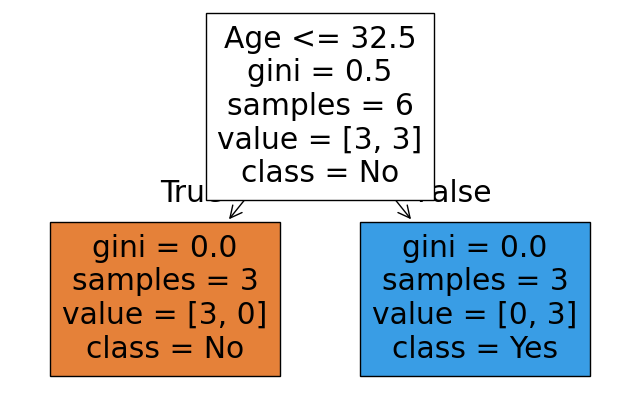

In [8]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Example dataset
X = [[25], [30], [45], [35], [22], [40]]
y = [0, 0, 1, 1, 0, 1]

# Create model
model = DecisionTreeClassifier(criterion='gini', max_depth=2)
model.fit(X, y)

# Predict
print("Prediction for age 28:", model.predict([[28]]))

# Visualize tree
plt.figure(figsize=(8,5))
tree.plot_tree(model, feature_names=["Age"], class_names=["No", "Yes"], filled=True)
plt.show()


5️⃣ Important Hyperparameters
---
🌳 max_depth
 - Limits tree height
 - Controls overfitting

🌳 min_samples_split
 - Minimum samples required to split a node

🌳 min_samples_leaf
 - Minimum samples at leaf node


 6️⃣ Overfitting in Decision Trees
---
Decision Trees:
 - Can memorize training data
 - Can grow very deep
 - Can achieve 100% training accuracy

But:
 - Perform poorly on test data

This is called high variance model.

7️⃣ Advantages
---
 - ✔ No feature scaling needed
 - ✔ Handles non-linear data
 - ✔ Easy to interpret
 - ✔ Works with categorical & numerical

 8️⃣ Disadvantages
 ---
 - ❌ Prone to overfitting
 - ❌ Unstable (small data change → different tree)

 Decision Tree doesn't need scaling because it splits based on feature thresholds, not distances.



How to control Overfitting
---
1. max_depth - Limits how deep the tree can grow.

```
DecisionTreeClassifier(max_depth=3)
```
Smaller depth → simpler tree → better generalization.

2. min_sample_split - Minimum samples required to split a node.
```
DecisionTreeClassifier(min_samples_split=10)
```
Prevents splitting small noisy groups.

3. min_samples_leaf - Minimum samples allowed in a leaf node.
```
DecisionTreeClassifier(min_samples_leaf=5)
```
Avoids tiny leaf nodes.

4. max_features - Limits number of features considered per split.


Concept: Bias–Variance in Trees
---
|Tree Type |	Bias |	Variance |
| --- | --- | --- |
| Shallow tree |	High |	Low |
| Deep tree |	Low |	High |

Decision Trees are naturally high-variance models.

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# X - Features, y - Target (label we want to predict)
# Loan Approval/Insurance Risk/Marketting Campaign:
# X is age, y - Approved/Rejected, HighRisk/LowRisk, Bought/NotBought
X = np.array([[25], [30], [45], [35], [22], [40]])
y = np.array([0, 0, 1, 1, 0, 1])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = DecisionTreeClassifier(max_depth=2, random_state=42)

model.fit(X_train, y_train)

print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

print("Prediction for age 28:", model.predict([[28]]))


Train accuracy: 1.0
Test accuracy: 0.5
Prediction for age 28: [0]


Train Accuracy: 1.0
Test Accuracy: 1.0
Prediction (Loan Approved?): [1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


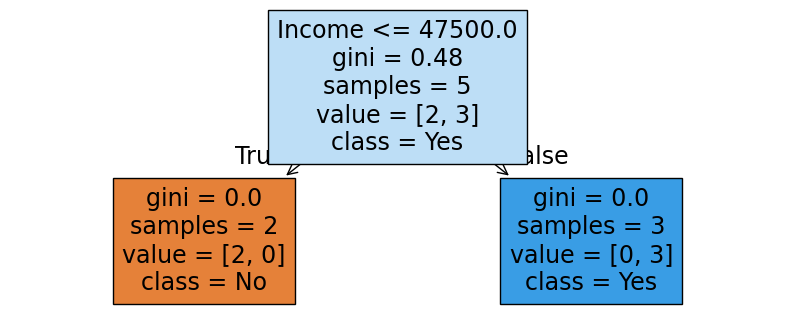

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

# 1️⃣ Create dataset
data = {
    "Age": [25, 40, 35, 28, 50, 45, 23, 38],
    "Income": [30000, 80000, 60000, 35000, 90000, 75000, 25000, 65000],
    "Marital_Status": ["Single", "Married", "Married", "Single",
                       "Married", "Married", "Single", "Divorced"],
    "Loan_Approved": [0, 1, 1, 0, 1, 1, 0, 1]
}

df = pd.DataFrame(data)

# 2️⃣ Encode categorical feature
le = LabelEncoder()
df["Marital_Status"] = le.fit_transform(df["Marital_Status"])

# 3️⃣ Separate features and target
X = df[["Age", "Income", "Marital_Status"]]
y = df["Loan_Approved"]

# 4️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5️⃣ Create and train model
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 6️⃣ Evaluate
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

# 7️⃣ Predict new customer
new_customer = [[30, 50000, le.transform(["Single"])[0]]]
print("Prediction (Loan Approved?):", model.predict(new_customer))

# 8️⃣ Visualize tree
plt.figure(figsize=(10,4))
tree.plot_tree(model, feature_names=X.columns,
               class_names=["No", "Yes"], filled=True)
plt.show()


Important Connection to SMOTE
---
Decision Trees work very well after SMOTE because:
- They handle synthetic points naturally
- No scaling needed
- Splits adapt to balanced classes

> Decision Trees reduce impurity at each split and can overfit unless controlled with depth and minimum sample constraints.

# Random Forest

1️⃣ Core Idea
-
Instead of building one tree, we build:
> 100 trees

And then:
- Each tree predicts
- Final prediction = majority vote (classification)
- Or average (regression)

This reduces variance.

2️⃣ Why It Works
-

A single tree is unstable:

Small data change → very different tree.

Random Forest:
- Builds many trees
- Each tree sees slightly different data
- Errors cancel out

It’s like:
> Ask 100 doctors instead of 1.

3️⃣ Two Sources of Randomness
-
This is IMPORTANT.

Random Forest introduces randomness in two ways:

🔹 A) Bootstrap Sampling

Each tree gets a random sample of training data (with replacement).

This is called Bagging (Bootstrap Aggregation).

----

🔹 B) Random Feature Selection

At each split:
- Instead of checking ALL features
- It checks only a RANDOM subset

This makes trees less correlated.

4️⃣ Why Variance Reduces
-
If trees are:
- Slightly different
- Slightly wrong in different ways

Averaging them:
- Cancels individual mistakes
- Reduces variance
- Improves generalization
----
5️⃣ Business Example (Loan Approval)
-
Instead of:
> 1 tree deciding loan

We build:
> 100 trees

If:
- 72 say Approve
- 28 say Reject

Final output = Approve


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = [[25], [30], [45], [35], [22], [40]]
y = [0, 0, 1, 1, 0, 1]

# Using previous X and y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

rf = RandomForestClassifier(
    n_estimators=100,   # number of trees
    max_depth=3,
    random_state=42
)

rf.fit(X_train, y_train)

print("Train Accuracy:", rf.score(X_train, y_train))
print("Test Accuracy:", rf.score(X_test, y_test))


Train Accuracy: 1.0
Test Accuracy: 0.5


7️⃣ Important Hyperparameters
🌲 n_estimators
-

Number of trees (default 100)

More trees → more stable (but slower)

🌲 max_depth

Limits tree size

🌲 max_features

Number of features considered per split

Default:
- sqrt(n_features) for classification

8️⃣ Decision Tree vs Random Forest
-
| Property |	Decision Tree |	Random Forest |
| ---- | ---- | ---- |
| Overfitting	| High |	Low |
|Variance |	High |	Reduced |
| Interpretability |	High |	Low |
|Accuracy	| Moderate |	High |

9️⃣ Does Random Forest Need Scaling?

Still ❌ No.

Because it is just many trees.

🔥 Very Important Concept

Random Forest reduces:

👉 Variance

It does NOT reduce:

👉 Bias significantly

> Random Forest reduces overfitting by averaging multiple de-correlated decision trees trained on bootstrapped data.

# 📊 Bias–Variance Summary

| Model |	Bias |	Variance |
| --- | --- | --- |
| Decision Tree |	Low |	High |
| Random Forest |	Low |	Lower |

🔥 Important Concept
-

Random Forest works best when:
- Individual trees are strong but noisy
- Errors are not perfectly correlated

That’s why we randomize:
- Data (bootstrapping)
- Features (random feature selection)

> Random Forest reduces variance by averaging multiple de-correlated decision trees.

# Feature Importance in Random Forest

🔹 What is Feature Importance?

It answers:

“Which features contributed most to predictions?”

In business terms:
- Which factor most influences Loan Approval?
- Income?
- Age?
- Marital Status?

🔹 How Random Forest Calculates It

Every time a feature:
- Is used for a split
- And reduces impurity (Gini decrease)

That reduction is accumulated.

More total impurity reduction → higher importance.

If tree keeps splitting on:
```
Income > 55000
Income > 70000
Income > 60000
```
Income gets high importance.

If Marital Status is rarely used → low importance.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# 1️⃣ Create Dataset
data = {
    "Age": [25, 40, 35, 28, 50, 45, 23, 38, 29, 48],
    "Income": [30000, 80000, 60000, 35000, 90000, 75000, 25000, 65000, 40000, 85000],
    "Marital_Status": ["Single", "Married", "Married", "Single",
                       "Married", "Married", "Single", "Single",
                       "Single", "Married"],
    "Loan_Approved": [0, 1, 1, 0, 1, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

# 2️⃣ Encode Categorical Feature
le = LabelEncoder()
df["Marital_Status"] = le.fit_transform(df["Marital_Status"])

# 3️⃣ Separate Features & Target
X = df[["Age", "Income", "Marital_Status"]]
y = df["Loan_Approved"]

# 4️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5️⃣ Train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=42
)

rf.fit(X_train, y_train)

# 6️⃣ Evaluate
print("Train Accuracy:", rf.score(X_train, y_train))
print("Test Accuracy:", rf.score(X_test, y_test))

# 7️⃣ Feature Importance
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)


Train Accuracy: 1.0
Test Accuracy: 1.0

Feature Importance:
          Feature  Importance
1          Income    0.415278
0             Age    0.400614
2  Marital_Status    0.184108


🔹 Sample Output (Example)
|Feature | Importance |
| --- | --- |
| Income |	0.55 |
| Age |	0.35 |
| Marital_Status |	0.10 |

Meaning:

Income is strongest predictor.

Marital Status contributes least.

🔹 Important Limitation ⚠️

Impurity-based importance can:
- Be biased toward continuous features
- Overestimate features with many unique values

For better reliability:
- Use permutation importance (we can cover later)


> Random Forest computes feature importance based on total impurity reduction contributed by each feature across all trees.

# Gradient Boosting

# Logistic Regression vs Random Forest

# Hyperparameter tuning